# **Exploratory Data Analysis**

## Initialisation

In [4]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import cv2
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

# Global Parameters
N_CLASSES = 5
CLASSES = [ "No DR", "Mild", "Moderate", "Severe", "Proliferative DR" ]

### Setup with Dataset Download (11G)

In [7]:
# Parameters
DATASET_PATH = '/content/APTOS2019'
TRAIN_PATH = DATASET_PATH + "/train_images/"
TEST_PATH = DATASET_PATH + "/test_images/"
N_CLASSES = 5
CLASSES = [ "No DR", "Mild", "Moderate", "Severe", "Proliferative DR" ]

In [ ]:
!gdown --id 1nAz6IUq9OJ309bgxXLz38zbDCKXnnb4r
!unzip APTOS2019.zip

### Setup with Google Drive Access

In [ ]:
from google.colab import drive
import os

# Parameters
DATASET_PATH = '/content/drive/My Drive/University Of Stirling/Dissertation/retinal-rec/Datasets/APTOS2019'
TRAIN_PATH = DATASET_PATH + "/train_images/"
TEST_PATH = DATASET_PATH + "/test_images/"

# Load Dataset From Drive
drive.mount('/content/drive')

os.chdir(DATASET_PATH)
print("CWD:",os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CWD: /content/drive/My Drive/University Of Stirling/Dissertation/retinal-rec/Datasets/APTOS2019


## Read Dataset

In [8]:
# Read Dataset
train = pd.read_csv(DATASET_PATH + "/train.csv")

## Data Visualisation

### Display basic dataset information

In [9]:
print("train.head()")
display(train.head())
print("\ntrain.shape")
display(train.shape)
print("\ntrain.info()")
display(train.info())


train.head()


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0



train.shape


(3662, 2)


train.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


None

### Display one sample from each DR class

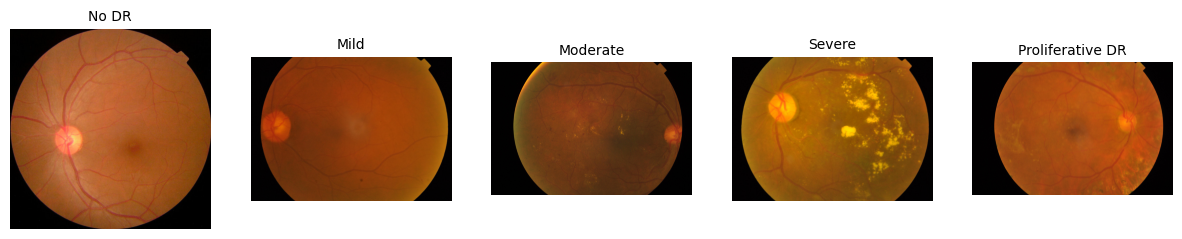

In [10]:
# Adjust figure sizes before display
plt.rcParams['figure.figsize'] = [15, 15] 
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['axes.titlesize'] = 10

# Instantiate plot
fig, ax = plt.subplots(1,5) 

for i in range(N_CLASSES):
  row = train.query("diagnosis ==" + str(i))
  img = cv2.imread(TRAIN_PATH + row["id_code"].values[0] + ".png")

  # cv2.COLOR_BGR2RGB is specified as CV2 utilises BGR, but our original image is RGB 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax[i].imshow(img) 
  ax[i].set_title(CLASSES[i]) 
  ax[i].axis('off')
    

## Display class distribution

The graph below highlights the class imbalance in the Dataset. The majority of observations belong to class 0 ("No DR"), while there's only a few samples pertaining to class 3 ("Severe DR"). This issue needs to be addressed in the preprocessing stage. 

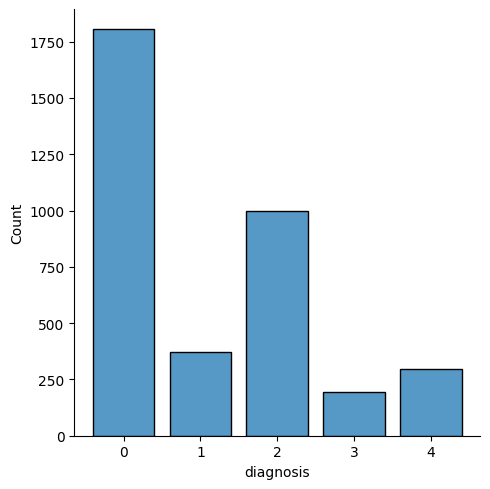

In [11]:
sns.displot(train, x="diagnosis", discrete=True, shrink=.8)